In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df=pd.read_csv("/heart.csv")
df.head()
df.tail()
df.shape
df.info()

df.describe()
df.corr()
for i in df.columns:
    for each in df[i].values:

        if each > 1 or each < -1:
            df[i] = (df[i] - np.min(df[i]))/(np.max(df[i]) - np.min(df[i]))
        else:
            pass
y = df["target"]
X = df.drop(["target"],axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
y_train

print(X_train.shape)
print(y_train.shape)

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
(242, 13)
(242,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
knn.score(X_test,y_test)

0.8032786885245902

Accuracy: 0.8033

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79        25
           1       0.93      0.72      0.81        36

    accuracy                           0.80        61
   macro avg       0.81      0.82      0.80        61
weighted avg       0.83      0.80      0.80        61



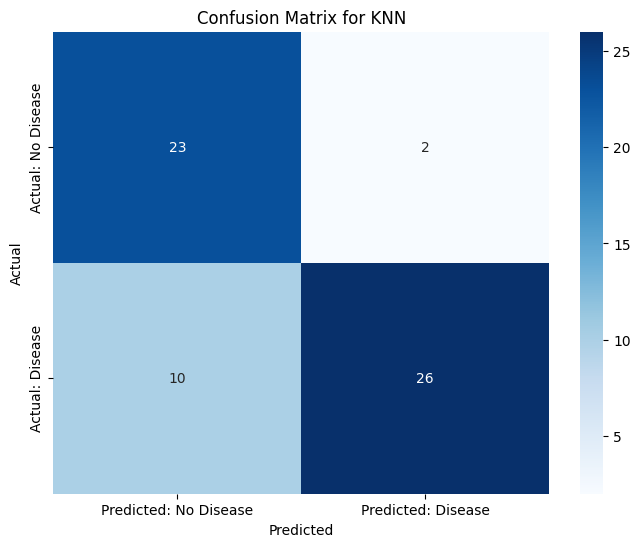

Confusion Matrix:
 [[23  2]
 [10 26]]


In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/heart.csv")

# Normalize the features (if necessary)
for i in df.columns:
    if df[i].max() > 1 or df[i].min() < -1:
        df[i] = (df[i] - np.min(df[i])) / (np.max(df[i]) - np.min(df[i]))

# Define target and features
y = df["target"]
X = df.drop(["target"], axis=1)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Model training using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Disease', 'Predicted: Disease'],
            yticklabels=['Actual: No Disease', 'Actual: Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN')
plt.show()

# Print the confusion matrix (optional)
print("Confusion Matrix:\n", cm)
